Part-1: Using the data set regularization_30_points.csv do the following

a) Use OLS and 5-fold cross validation to arrive at the coefficients corresponding to the
least RMSE values. 

In [52]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import seaborn as sns

In [53]:
#importing and reading data
df=pd.read_csv('regularization_30_points.csv')

df.shape
#df.info()
#df.dropna()
#df.isnull() ,df.fillna(0)
#df.head(3)
df.columns


Index(['y', 'x', 'x.1', 'x.2', 'x.3', 'x.4', 'x.5', 'x.6', 'x.7', 'x.8',
       'x.9'],
      dtype='object')

In [54]:
sns.set()
#plt.figure(figsize=(4,4))
#sns.pairplot(df,diag_kind='kde')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.30, random_state=100)
#model=LinearRegression()
#model.fit(X_train,Y_train)
#pred_train=model.predict(X_train)
#RMSE_train=mean_squared_error(Y_train,pred_train)
#pred_test=model.predict(X_test)
#RMSE_test=mean_squared_error(Y_test,pred_test)
#RMSE_train,RMSE_test

In [95]:
#importing sklearn  #5 -fold cross validation
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
RMSE_train=[]
RMSE_test=[]
coff=[]
for i in range(1,6):
    df=shuffle(df)
    X=df.iloc[:,1:11]
    y=df.iloc[:,0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)
    model=LinearRegression()
    model.fit(X_train,y_train)
    pred_train=model.predict(X_train)
    MSE_train=m.sqrt(mean_squared_error(y_train,pred_train))
    RMSE_train.append(MSE_train)
    pred_test=model.predict(X_test)
    MSE_test=m.sqrt(mean_squared_error(y_test,pred_test))
    RMSE_test.append(MSE_test)
    coff.append(model.coef_)
index_min=RMSE_test.index(min(RMSE_test))
print('RMSE_train_min \n',min(RMSE_train))
print('RMSE_test_min \n',min(RMSE_test))
print('cofficents')
f={'variable':list(X.columns),'cofficent':list(coff[index_min])}
f1=pd.DataFrame(f).transpose()
f1

RMSE_train_min 
 0.3314078419749401
RMSE_test_min 
 0.6236164765494742
cofficents


,0,1,2,3,4,5,6,7,8,9
variable,x,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9
cofficent,3.77854,-2.55092,-7.40288,10.2462,-7.82629,-12.788,33.7497,-4.03968,-25.8489,12.2225


b- Using RIDGE regression and various values (say 20) of λ between 0.0 and 10 find out the RIDGE regression coefficients and the RMSE values w.r.t. the training data itself. 
Also create a plot of the coefficients v/s λ. 

RMSE 
 [0.43267787336162833, 0.5322796020574262, 0.573869088454084, 0.607675832537254, 0.635795198123271, 0.6593930147531145, 0.6793971467484993, 0.6965361138593589, 0.7113722398651459, 0.724338268606882, 0.7357689203303388, 0.7459254028255269, 0.755013686532009, 0.7631979442897382, 0.7706104245153981, 0.7773587412418593, 0.7835313005141215, 0.7892013779236118, 0.794430213229231, 0.7992693825773987]
 
Table:1 cofficents for 20 different values of lamda[0:.5:10]
           x       x.1       x.2        x.3        x.4        x.5        x.6  \
0   3.513793 -3.887139 -8.644205  24.903084  12.454171 -63.964023 -15.467902   
1   1.586323 -0.363789 -1.219771   0.070537  -0.980238   0.175368  -0.418204   
2   1.283964 -0.324180 -0.855382   0.053860  -0.833904   0.173975  -0.463987   
3   1.100418 -0.285007 -0.679470   0.050032  -0.726335   0.156320  -0.448005   
4   0.970060 -0.251296 -0.569746   0.045863  -0.645293   0.136844  -0.422632   
5   0.870655 -0.223499 -0.493116   0.041253  -0.581997

(Text(0.5, 1.0, 'lamda vs cofficent graph'),
 Text(0.5, 0, 'lamda'),
 Text(0, 0.5, 'cofficent'))

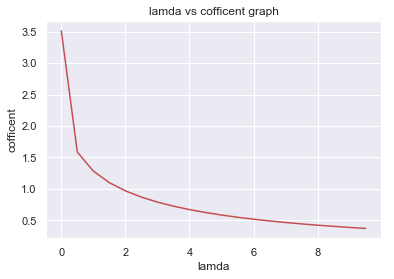

In [206]:
lamda=np.arange(0,10,.5)
RMSE=[]
coff=[]
from sklearn.linear_model import Ridge
for i in range(len(lamda)):
    model_ridge=Ridge(alpha=lamda[i])
    model_ridge.fit(X,y)
    pred=model_ridge.predict(X)
    rmse=m.sqrt(mean_squared_error(y,pred))
    RMSE.append(rmse)
    coff.append(model_ridge.coef_)
index_min=RMSE.index(min(RMSE))
coff_opt=coff[index_min]
print('RMSE \n',RMSE)
print(" ")
coff1=pd.DataFrame(coff)
coff1.columns=X.columns
print("Table:1 cofficents for 20 different values of lamda[0:.5:10]")
print(coff1)
plt.figure()
plt.plot(lamda,coff1.iloc[:,0],'r')
plt.title('lamda vs cofficent graph'),plt.xlabel('lamda'),plt.ylabel('cofficent')


([<matplotlib.lines.Line2D at 0x1a694030278>],
 Text(0.5, 1.0, 'lamda V/s RMSE plot'),
 Text(0.5, 0, 'lamda'),
 Text(0, 0.5, 'RMSE'))

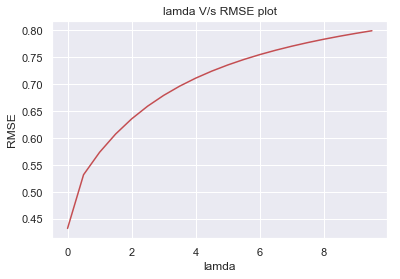

In [193]:
plt.figure()
plt.plot(lamda,RMSE,'r'),plt.title('lamda V/s RMSE plot'),plt.xlabel('lamda'),plt.ylabel('RMSE')

1.(c) Using RIDGE regression and 10-fold cross validation find out the most optimum value of λ. 
Also create a plot of coefficients v/s  λ.Use appropriate Python packages /
funcions to perform this task

[1.0923024518673574, 0.6586595604553649, 0.7114971788648223, 0.7511379992879572, 0.780851278692236, 0.803771926631854, 0.8219627411839251, 0.8367583869978655, 0.8490427949819563, 0.8594192338544517, 0.8683117161188354, 0.876026394038609, 0.8827897080107142, 0.8887727590301657, 0.894107304983131, 0.898896526488018, 0.9032224416921439, 0.9071511218612466, 0.9107364311905658, 0.9140227557791702]
optimum_lamda = 0.5
minimun_RMSE =  0.6586595604553649
optimum_coff 
 0    -3.887139
1    -0.363789
2    -0.324180
3    -0.285007
4    -0.251296
5    -0.223499
6    -0.200752
7    -0.182066
8    -0.166600
9    -0.153686
10   -0.142809
11   -0.133570
12   -0.125661
13   -0.118839
14   -0.112916
15   -0.107740
16   -0.103190
17   -0.099168
18   -0.095594
19   -0.092404
Name: 1, dtype: float64


(Text(0.5, 1.0, 'lamda vs cofficent graph(Ridge)'),
 Text(0.5, 0, 'lamda'),
 Text(0, 0.5, 'cofficent'))

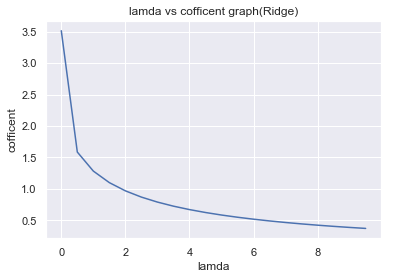

In [248]:
lamda=np.arange(0,10,.5)
RMSE_cv=[]
coff_cv=[]
from sklearn.model_selection import cross_val_score
for i in  range(len(lamda)):
    ridge=Ridge(alpha=lamda[i])
    ridge.fit(X,y)
    #pred_y=ridge.predict(X)
    mse=abs(cross_val_score(ridge, X, y,scoring='neg_mean_squared_error',cv=5).mean())
    RMSE_cv.append(m.sqrt(mse))
    coff_cv.append(ridge.coef_)
print(RMSE_cv)
coff_cv=pd.DataFrame(coff_cv)
#plt.plot(lamda,RMSE_cv)
index_min=RMSE_cv.index(min(RMSE_cv))
print('optimum_lamda =',lamda[index_min])
print('minimun_RMSE = ',RMSE_cv[index_min])
print('optimum_coff \n',coff_cv[index_min])
plt.plot(lamda,coff_cv.iloc[:,0],'b')
plt.title('lamda vs cofficent graph(Ridge)'),plt.xlabel('lamda'),plt.ylabel('cofficent')

d) Using LASSO regression and and 10-fold cross validation find out the most optimum value of λ. 
Also create a plot of coefficients v/s  λ. Use appropriate Python packages / funcions to perform this task. 

[1.0358895290143084, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938]
optimum_lamda = 1.0
minimun_RMSE =  1.0328953845009938
optimum_coff 
 0    -0.0
1    -0.0
2    -0.0
3    -0.0
4    -0.0
5    -0.0
6    -0.0
7    -0.0
8    -0.0
9    -0.0
10   -0.0
11   -0.0
12   -0.0
13   -0.0
14   -0.0
15   -0.0
16   -0.0
17   -0.0
18   -0.0
19   -0.0
Name: 1, dtype: float64
      0    1    2    3    4    5    6    7    8    9
0  -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0
1  -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0
2  -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0
3  -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0
4  -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0

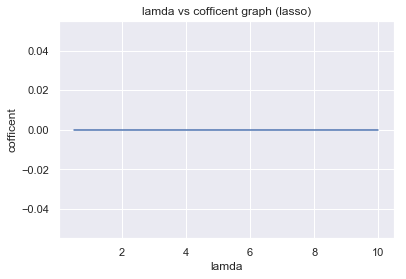

In [272]:
from sklearn.linear_model import Lasso
lamda=np.arange(0.5,10.5,.5)
RMSE_l=[]
coff_l=[]
from sklearn.model_selection import cross_val_score
for i in  range(len(lamda)):
    lasso=Lasso(alpha=lamda[i])
    lasso.fit(X,y)
    #pred_y=Lasso.predict(X)
    mse=abs(cross_val_score(lasso, X, y,scoring='neg_mean_squared_error',cv=5).mean())
    RMSE_l.append(m.sqrt(mse))
    coff_l.append(lasso.coef_)
print(RMSE_l)
coff_l=pd.DataFrame(coff_l)
#plt.plot(lamda,RMSE_l)
index_min=RMSE_l.index(min(RMSE_l))
print('optimum_lamda =',lamda[index_min])
print('minimun_RMSE = ',RMSE_l[index_min])
print('optimum_coff \n',coff_l[index_min])
plt.plot(lamda,coff_l.iloc[:,0],'b')
plt.title('lamda vs cofficent graph (lasso)'),plt.xlabel('lamda'),plt.ylabel('cofficent')
print(coff_l)

f-Using ELASTiC NET and 10-fold cross validation find out the most optimum regression coefficients.
Use appropriate Python packages / funcions to perform this task.

[1.033258564062702, 1.0348303517655486, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938, 1.0328953845009938]
optimum_lamda = 1.5
minimun_RMSE =  1.0328953845009938
optimum_coff 
 0    -0.0
1    -0.0
2    -0.0
3    -0.0
4    -0.0
5    -0.0
6    -0.0
7    -0.0
8    -0.0
9    -0.0
10   -0.0
11   -0.0
12   -0.0
13   -0.0
14   -0.0
15   -0.0
16   -0.0
17   -0.0
18   -0.0
19   -0.0
Name: 2, dtype: float64
      0    1    2    3         4    5         6    7    8    9
0   0.0 -0.0 -0.0 -0.0 -0.098808 -0.0 -0.061155 -0.0 -0.0 -0.0
1  -0.0 -0.0 -0.0 -0.0 -0.000000 -0.0 -0.000000 -0.0 -0.0 -0.0
2  -0.0 -0.0 -0.0 -0.0 -0.000000 -0.0 -0.000000 -0.0 -0.0 -0.0
3  -0.0 -0.0 -0.0 -0.0 -0.000000 -0.0 -0.000000 -0.0 -

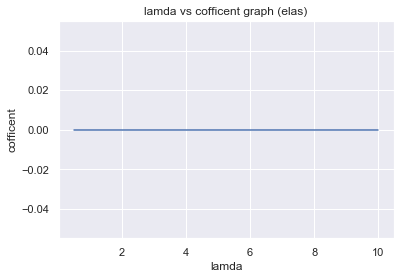

In [273]:
from sklearn.linear_model import ElasticNet
lamda=np.arange(.5,10.5,.5)
RMSE_e=[]
coff_e=[]
from sklearn.model_selection import cross_val_score
for i in  range(len(lamda)):
    elas=ElasticNet(alpha=lamda[i])
    elas.fit(X,y)
    #pred_y=Lasso.predict(X)
    mse=abs(cross_val_score(elas, X, y,scoring='neg_mean_squared_error',cv=5).mean())
    RMSE_e.append(m.sqrt(mse))
    coff_e.append(elas.coef_)
print(RMSE_e)
coff_e=pd.DataFrame(coff_e)
#plt.plot(lamda,RMSE_e)
index_min=RMSE_e.index(min(RMSE_e))
print('optimum_lamda =',lamda[index_min])
print('minimun_RMSE = ',RMSE_e[index_min])
print('optimum_coff \n',coff_e[index_min])
plt.plot(lamda,coff_e.iloc[:,0],'b')
plt.title('lamda vs cofficent graph (elas)'),plt.xlabel('lamda'),plt.ylabel('cofficent')
print(coff_e) 

#only two variables are required for the model...that is X4 and X6